# Watershed Segmentation<br>
Mitali Baj<br>
N002<br>
MBATech CS<br>
B1<br>
70472019154<br>

**Problem Statement**<br>
Farmers today carry the transportation cost themselves to transport their produce into wholesale and APMC Markets like Vashi, Nashik etc. Their farm produce is then graded by buyers according to the quality, quantity into A-grade, B-grade (and more) categories. The quality is decided using various factors like size of each piece of fruit/vegetable, color, weight etc. Sometimes grading can mark a portion of produce into say A-category and other into B-category. Each category provides farmers with different prices at different market locations. This creates opportunity cost for farmers due to price disparity and also leads to losses as the transportation cost has already been incurred.<br><br>
**Solution**<br>
Remote identification of the quality and quantity of produce. This will help farmers decide which market to transport and sell their different sections of produce to get the maximum overall profit using the price disparity to their advantage now.<br>
The remote identification of quality of product also has wide scale application into the export sector, where the customers today rely only on personal relations and trust. Buyers and Sellers in the export market can trade more freely when quality can be assured using technological support.<br>
Watershed segmentation is used here to identify the separate and total number of objects present in the image. Contours are drawn appropriately using the segmentation results. These contours can further be used for quality identification based on the radius, size of each contour, or the color of each fruit/vegetable i.e. the contour. Identify if there are any spots on the skin of the product, or the percentage of produce which is ripe and unripe.

**Watershed segmentation**<br>
It is widely used for separating similar objects in the image that are touching each other.<br>
It considers that in an image high-intensity pixel values represent peaks (white areas), whereas low-intensity values represent valleys – local minima (black areas).<br>
We partition the image into two different sets: <br>
 - The dark areas are called catchment basins – the group of connected pixels with the same local minimum. <br>
 - Lines that divide one catchment area from another are called watershed lines.<br>
 
 The goal of this algorithm is to identify watershed lines.

<div>
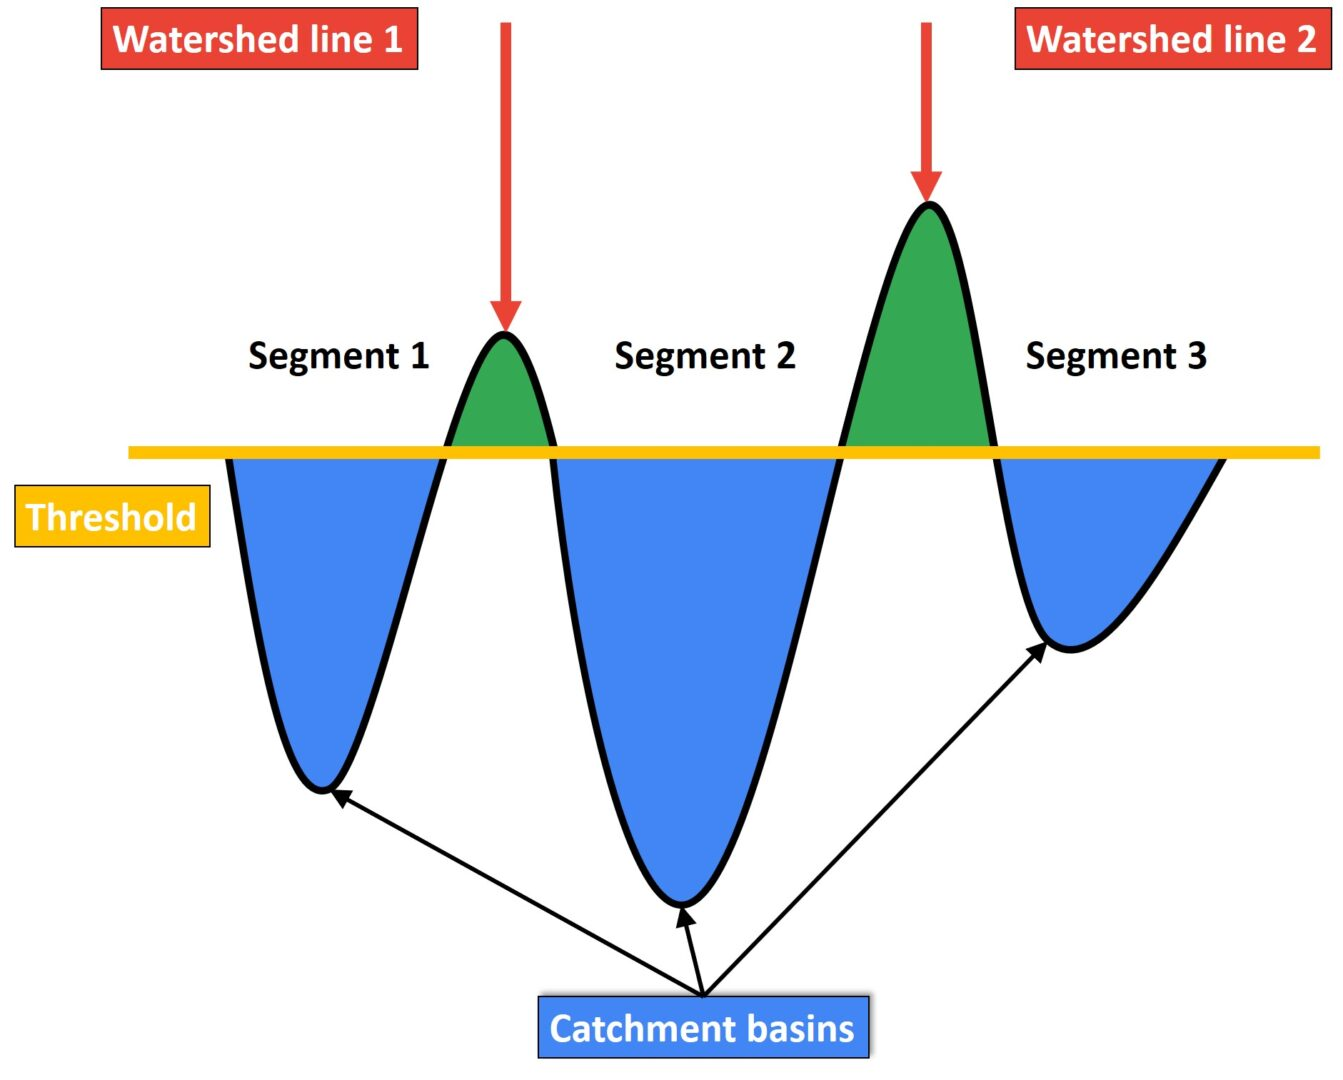
</div>

**Watershed Segmentation Steps**<br>
1) Read the image<br>
2) Binarization of image using thresholding<br>
3) Applying **Distance transform** on the binary image.<br>
Distance Transform calculates the distance to the closest zero pixel for each pixel of the source image. A classic way of separating touching objects in binary images makes use of the distance transform and the watershed method. Distance transform creates boundary for two touching objects.

<div>
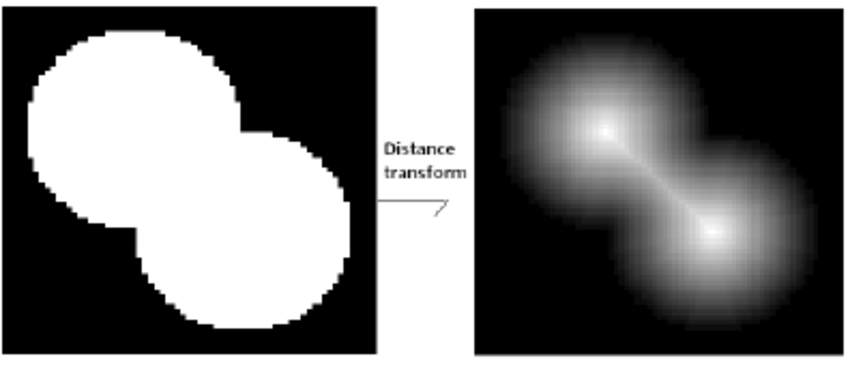
</div>

4) Finding **peaks** in the distance transformed image. The output will give us the markers which will be used in the watershed function.<br>
5) Perform a **connected component analysis** on the local peaks. It is used to uniquely label the markers which will be used in watershed function.

Connected Component Analysis<br>
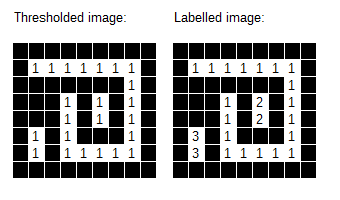<br>

6) Apply Watershed algorithm on the inverted distance transformed image. Since the watershed algorithm assumes our markers represent local minima we need to invert our distance transform image.<br>
7) Draw contours for each individual segment detected.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.feature import peak_local_max
import scipy
from skimage.segmentation import watershed
import imutils

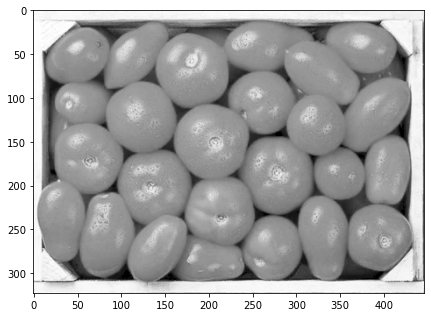

In [2]:
# Read the image
image = cv2.imread('tomato3.png',0) 
# Display the image
plt.figure(figsize=(7,7))
plt.imshow(image, cmap = 'gray')

Text(0.5, 1.0, 'Binary image')

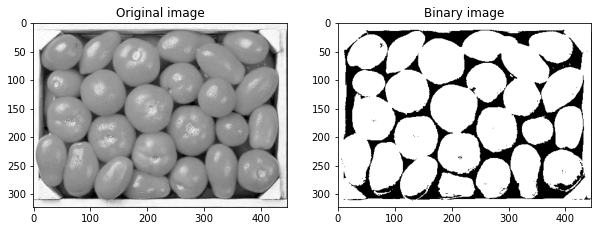

In [3]:
# Binarization using Simple Thresholding
d = image.copy()
T = 126
r,c = d.shape
for i in range(r):
    for j in range(c):
        if d[i,j] < T:
            d[i,j] = 0
        else:
            d[i,j] = 255
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(d,cmap='gray')
plt.title('Binary image')

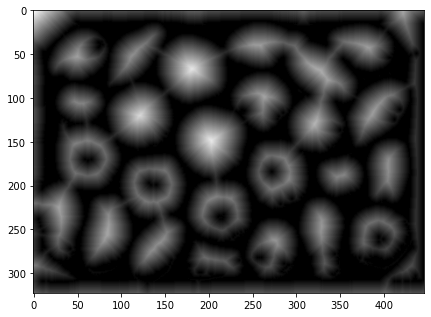

In [4]:
#Applying Distance Transform
#Calculates the distance to the closest zero pixel for each pixel of the source image.
transformed = cv2.distanceTransform(d, cv2.DIST_L2, 3) 
plt.figure(figsize=(7,7))
plt.imshow(transformed, cmap = 'gray')

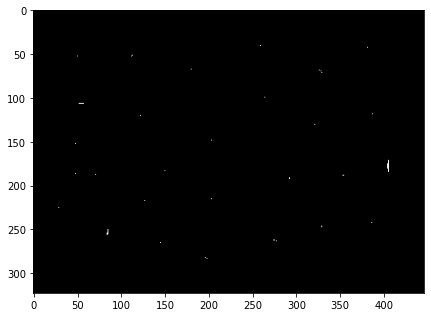

In [5]:
#Finding peaks in the distance transformed image
localMax = peak_local_max(transformed, indices=False, min_distance=20,labels=d)
plt.figure(figsize=(7,7))
plt.imshow(localMax, cmap = 'gray')

In [6]:
#perform a connected component analysis on the local peaks
markers = scipy.ndimage.label(localMax, structure=np.ones((3, 3)))[0]
#apply the Watershed algorithm
labels = watershed(-transformed, markers, mask=d)
print("{} unique segments found".format(len(np.unique(labels)) - 1))

32 unique segments found


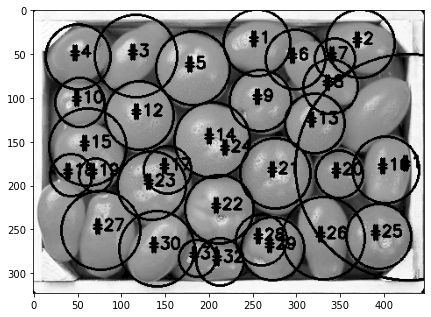

In [7]:
# loop over the unique labels returned by the Watershed algorithm
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background' so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw it on the mask
    mask = np.zeros(d.shape, dtype="uint8")
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.figure(figsize = (7,7))
plt.imshow(image, cmap = 'gray')

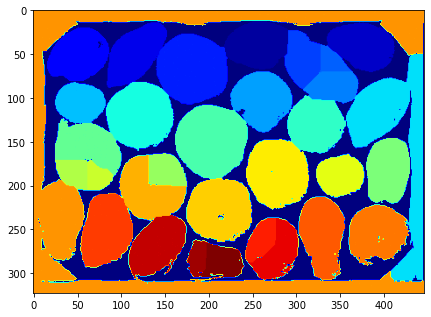

In [8]:
plt.figure(figsize = (7,7))
plt.imshow(labels, cmap = 'jet')

**Conclusion**<br>
Successfully applied Watershed algorithm for segmenting similar looking, touching objects like tomatoes. Applied preprocessing techniques for watershed such as:<br>
- binarization using thresholding
- distance transform
- finding local peaks
- connected component analysis<br>
Performed contour detection and drawing using the watershed segmented result to identify the different objects and number of objects present in the image.